# 決定木

In [1]:
import csv
import numpy as np
with open('./csv/titanic.csv','r') as csvfile:
    titanic_reader = csv.reader(csvfile,delimiter=',',quotechar='"')

    #特徴量の名前が書かれたHeaderを読み取る
    row = next(titanic_reader)
    feature_names = np.array(row)

    #データと正解ラベルを読み取る
    titanic_x, titanic_y = [],[]
    for row in titanic_reader:
        titanic_x.append(row)
        titanic_y.append(row[2]) #正解ラベルは3列目の"survived"

    titanic_x = np.array(titanic_x) #型をリストからnumpy.ndarrayにする
    titanic_y = np.array(titanic_y) #型をリストからnumpy.ndarrayにする

print(feature_names)
print(titanic_x[0],titanic_y[0])

['row.names' 'pclass' 'survived' 'name' 'age' 'embarked' 'home.dest'
 'room' 'ticket' 'boat' 'sex']
['1' '1st' '1' 'Allen, Miss Elisabeth Walton' '29.0000' 'Southampton'
 'St Louis, MO' 'B-5' '24160 L221' '2' 'female'] 1


# 前処理 / 特徴量選択

In [2]:
# class(1),age(4),sex(10)を残す
titanic_x = titanic_x[:,[1, 4, 10]]
feature_names = feature_names[[1, 4, 10]]

print(feature_names)
print(titanic_x[12],titanic_y[12])

['pclass' 'age' 'sex']
['1st' 'NA' 'female'] 1


# 欠損値の補完

In [3]:
# 年齢の欠損値を平均値で埋める
ages = titanic_x[:,1]
#NA以外のageの平均値を計算する
mean_age = np.mean(titanic_x[ages != 'NA',1].astype(float))
#ageがNAのものを平均値に置き換える
titanic_x[titanic_x[:, 1] == 'NA',1] = mean_age

# LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(titanic_x[:, 2])
print('Categorical classes:',label_encoder.classes_)

integer_classes = label_encoder.transform(label_encoder.classes_)
print('Integer classes:',integer_classes)

t = label_encoder.transform(titanic_x[:, 2])
titanic_x[:,2] = t

print(feature_names)
print(titanic_x[12],titanic_y[12])

Categorical classes: ['female' 'male']
Integer classes: [0 1]
['pclass' 'age' 'sex']
['1st' '31.19418104265403' '0'] 1


# OneHotEncoder

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = LabelEncoder()
label_encoder = enc.fit(titanic_x [:, 0])
print("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(3, 1)
print("Integer classes:", integer_classes)
enc = OneHotEncoder()
one_hot_encoder = enc.fit(integer_classes)

#最初に、Label Encoderを使ってpclassを0-2に直す
num_of_rows = titanic_x.shape[0]
t = label_encoder.transform(titanic_x[:, 0]).reshape(num_of_rows, 1)
#次に、OneHotEncoderを使ってデータを1, 0に変換
new_features = one_hot_encoder.transform(t)
#1,0になおしてデータを統合する
titanic_x = np.concatenate([titanic_x, new_features.toarray()], axis = 1)
#OnehotEncoderをする前のpclassのデータを削除する
titanic_x = np.delete(titanic_x, [0], 1)
#特徴量の名前を更新する
feature_names = ['age', 'sex', 'first class', 'second class', 'third class']

# Convert to numerical values
titanic_x = titanic_x.astype (float)
titanic_y = titanic_y.astype (float)

print(feature_names)
print(titanic_x[0],titanic_y[0])

Categorical classes: ['1st' '2nd' '3rd']
Integer classes: [[0]
 [1]
 [2]]
['age', 'sex', 'first class', 'second class', 'third class']
[29.  0.  1.  0.  0.] 1.0


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# 学習

In [9]:
# sklearn 0.20から下記は廃止されます
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_x,titanic_y, test_size=0.25, random_state=33)
# 次にscikit-learnのDecision Tree Classifierを使って学習します。

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 3, min_samples_leaf = 5)
clf = clf.fit(x_train, y_train)
# 今回は、パラメータとしてcriterion, max_depth, min_samples_leafを指定します。
"""
criterion・・・　分類基準（entropyとginiがある）
max_depth・・・　木の深さ
min_samples_split・・・　分割するときに必要なデータ数
"""

'\ncriterion・・・\u3000分類基準（entropyとginiがある）\nmax_depth・・・\u3000木の深さ\nmin_samples_split・・・\u3000分割するときに必要なデータ数\n'

# 学習した結果を可視化する

In [8]:
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names = ['age','Sex','1st_c1ass','2nd_class','3rd_class'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("./result/tree.pdf")

InvocationException: GraphViz's executables not found

In [10]:
# 決定木モデルの評価
measure_performance(x_train, y_train, clf)

NameError: name 'measure_performance' is not defined

# ランダムフォレスト

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=30, random_state=0)
clf_rf = clf_rf.fit(x_train, y_train)

In [13]:
import sklearn.metrics as metrics
# 決定木の章で定義した関数と同じ関数
def measure_performance(x,y,clf, show_accuracy=True,show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(x)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)), "\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")

    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")


measure_performance(x_train, y_train, clf_rf)

Accuracy:0.874 

Classification report
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       662
         1.0       0.91      0.68      0.78       322

    accuracy                           0.87       984
   macro avg       0.89      0.82      0.85       984
weighted avg       0.88      0.87      0.87       984
 

Confussion matrix
[[641  21]
 [103 219]] 



# ランダムフォレストの回帰の実装例

MSE train : 1.433, test : 11.807
MSE train : 0.983, test : 0.858


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


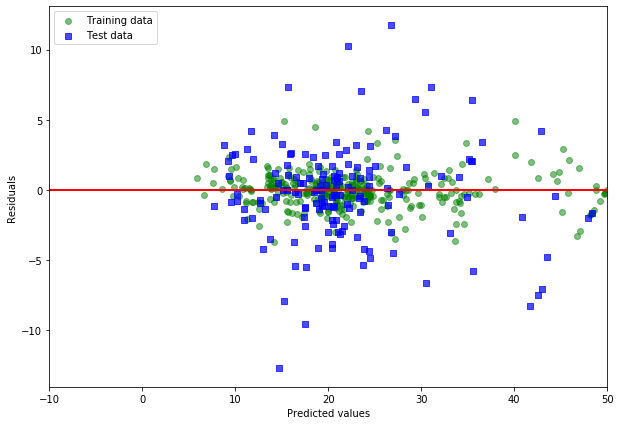

In [15]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# ボストン近郊の住宅データの読み込み
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

# 説明変数及び目的変数
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values

# 学習用、検証用データに分割
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 0)

# モデル構築
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )

# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

# 残差プロット
# %matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'green', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'blue', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()

# 分類のプログラム

In [16]:
import csv
import numpy as np

with open('./csv/titanic.csv','r') as csvfile:
    titanic_reader = csv.reader(csvfile,delimiter=',',quotechar='"')

    #特徴量の名前が書かれたHeaderを読み取る
    row = next(titanic_reader)
    feature_names = np.array(row)

    #データと正解ラベルを読み取る
    titanic_x, titanic_y = [],[]
    for row in titanic_reader:
        titanic_x.append(row)
        titanic_y.append(row[2]) #正解ラベルは3列目の"survived"

    titanic_x = np.array(titanic_x) #型をリストからnumpy.ndarrayにする
    titanic_y = np.array(titanic_y) #型をリストからnumpy.ndarrayにする

print(feature_names)
print(titanic_x[0],titanic_y[0])


# class(1),age(4),sex(10)を残す
titanic_x = titanic_x[:,[1, 4, 10]]
feature_names = feature_names[[1, 4, 10]]

print(feature_names)
print(titanic_x[12],titanic_y[12])


# 年齢の欠損値を平均値で埋める
ages = titanic_x[:,1]
# NA以外のageの平均値を計算する
mean_age = np.mean(titanic_x[ages != 'NA',1].astype(float))

# 上記コードでValueError: could not convert string to float:というエラーが出る場合は、下記のように変更してください。
# mean_age = np.mean(titanic_x[ages != '',1].astype(float))

# ageがNAのものを平均値に置き換える
titanic_x[titanic_x[:, 1] == 'NA',1] =mean_age


from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(titanic_x[:, 2])
print('Cateorical classes:',label_encoder.classes_)

integer_classes = label_encoder.transform(label_encoder.classes_)
print('Integer classes:',integer_classes)

t = label_encoder.transform(titanic_x[:, 2])
titanic_x[:,2] = t

print(feature_names)
print(titanic_x[12],titanic_y[12])


from sklearn.preprocessing import OneHotEncoder
enc = LabelEncoder()
label_encoder = enc.fit(titanic_x [:, 0])
print("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(3, 1)
print("Integer classes:", integer_classes)
enc = OneHotEncoder()
one_hot_encoder = enc.fit(integer_classes)

# 最初に、Label Encoderを使ってpclassを0-2に直す
num_of_rows = titanic_x.shape[0]
t = label_encoder.transform(titanic_x[:, 0]).reshape(num_of_rows, 1)
#次に、OneHotEncoderを使ってデータを1, 0に変換
new_features = one_hot_encoder.transform(t)
#1,0になおしてデータを統合する
titanic_x = np.concatenate([titanic_x, new_features.toarray()], axis = 1)
#OnehotEncoderをする前のpclassのデータを削除する
titanic_x = np.delete(titanic_x, [0], 1)
#特徴量の名前を更新する
feature_names = ['age', 'sex', 'first class', 'second class', 'third class']

# Convert to numerical values
titanic_x = titanic_x.astype (float)
titanic_y = titanic_y.astype (float)

print(feature_names)
print(titanic_x[0],titanic_y[0])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.25, random_state=0)


from sklearn import metrics
def measure_performance(x,y,clf, show_accuracy=True,show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(x)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)), "\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")

    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 3, min_samples_leaf = 5)
clf = clf.fit(x_train, y_train)

import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names = ['age','Sex','1st_c1ass','2nd_class','3rd_class'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("./result/tree.pdf")

#決定木モデルの評価
measure_performance(x_train, y_train, clf)


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30, random_state=0)
clf = clf.fit(x_train, y_train)

#ランダムフォレストモデルの評価
measure_performance(x_train, y_train, clf)

['row.names' 'pclass' 'survived' 'name' 'age' 'embarked' 'home.dest'
 'room' 'ticket' 'boat' 'sex']
['1' '1st' '1' 'Allen, Miss Elisabeth Walton' '29.0000' 'Southampton'
 'St Louis, MO' 'B-5' '24160 L221' '2' 'female'] 1
['pclass' 'age' 'sex']
['1st' 'NA' 'female'] 1
Cateorical classes: ['female' 'male']
Integer classes: [0 1]
['pclass' 'age' 'sex']
['1st' '31.19418104265403' '0'] 1
Categorical classes: ['1st' '2nd' '3rd']
Integer classes: [[0]
 [1]
 [2]]
['age', 'sex', 'first class', 'second class', 'third class']
[29.  0.  1.  0.  0.] 1.0


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


InvocationException: GraphViz's executables not found

# 回帰のプログラム

MSE train : 1.889, test : 16.044
MSE train : 0.978, test : 0.807


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


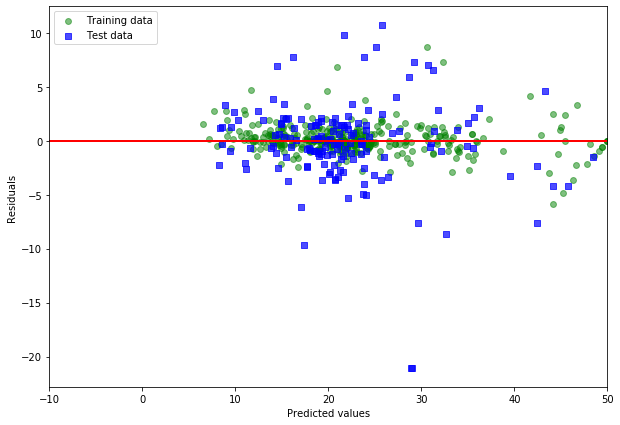

In [17]:
# ======= 回帰 =======
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# データの読み込み
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

# 説明変数及び目的変数
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values

# 学習用、検証用データに分割
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 0)

# モデル構築
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )

# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

# 残差プロット
# %matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'green', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'blue', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()